In [2]:
import pandas as pd
import numpy as np

In [4]:

automobile = pd.read_csv('Automobile_data.csv')
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
automobile.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
automobile['normalized-losses'].loc[automobile['normalized-losses'] == '?'].count()

41

In [9]:
nl = automobile['normalized-losses'].loc[automobile['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
automobile['normalized-losses'] = automobile['normalized-losses'].replace('?',nlmean).astype(int)
automobile['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int64

In [10]:
automobile['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [11]:
automobile['price'].loc[automobile['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [12]:
price = automobile['price'].loc[automobile['price'] != '?']
pmean = price.astype(str).astype(int).mean()
automobile['price'] = automobile['price'].replace('?',pmean).astype(int)
automobile['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [13]:
automobile['horsepower'].str.isnumeric().value_counts()
horsepower = automobile['horsepower'].loc[automobile['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
automobile['horsepower'] = automobile['horsepower'].replace('?',pmean).astype(int)

In [14]:
automobile.loc[automobile['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9895


In [15]:
automobile[np.abs(automobile.horsepower-automobile.horsepower.mean())<=(3*automobile.horsepower.std())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,13207


In [16]:
automobile['bore'].loc[automobile['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [17]:
automobile['bore'] = pd.to_numeric(automobile['bore'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [18]:
automobile['stroke'] = pd.to_numeric(automobile['stroke'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [19]:
automobile['peak-rpm'] = pd.to_numeric(automobile['peak-rpm'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [20]:
automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']
automobile = automobile[automobile['num-of-doors'] != '?']
automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [21]:
import matplotlib.pyplot as plt
% matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
UsageError: Line magic function `%` not found.


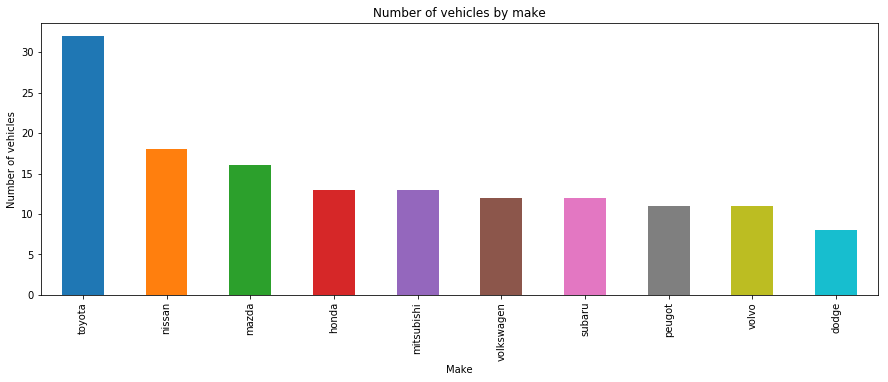

In [22]:
automobile.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

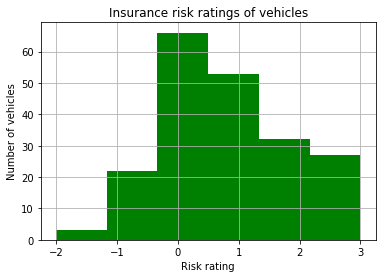

In [23]:
automobile.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

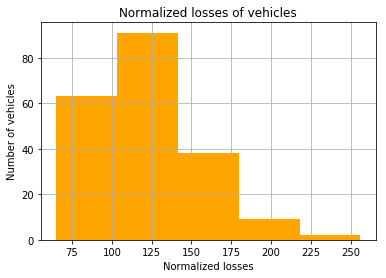

In [24]:
automobile['normalized-losses'].hist(bins=5,color='orange');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

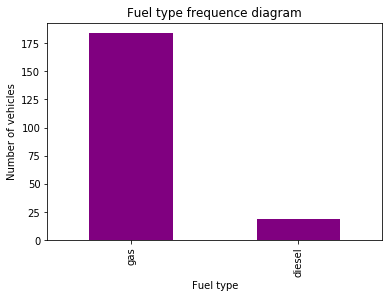

In [25]:
automobile['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

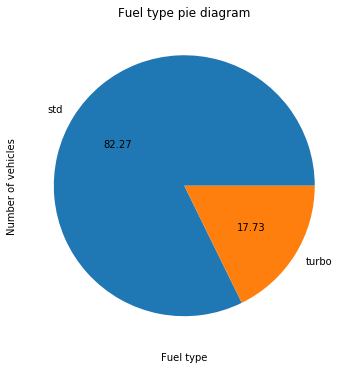

In [26]:
automobile['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

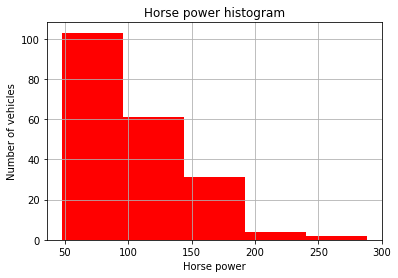

In [27]:
automobile.horsepower[np.abs(automobile.horsepower-automobile.horsepower.mean())<=(3*automobile.horsepower.std())].hist(bins=5,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

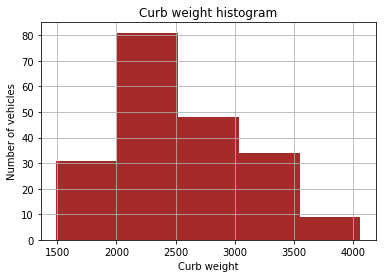

In [28]:
automobile['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

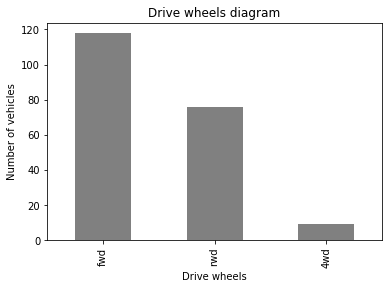

In [29]:
automobile['drive-wheels'].value_counts().plot(kind='bar',color='grey')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

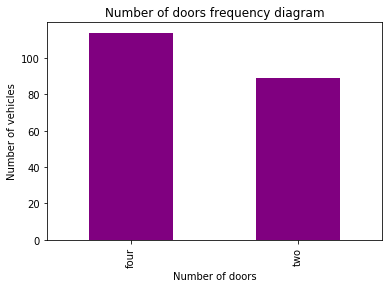

In [30]:
automobile['num-of-doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

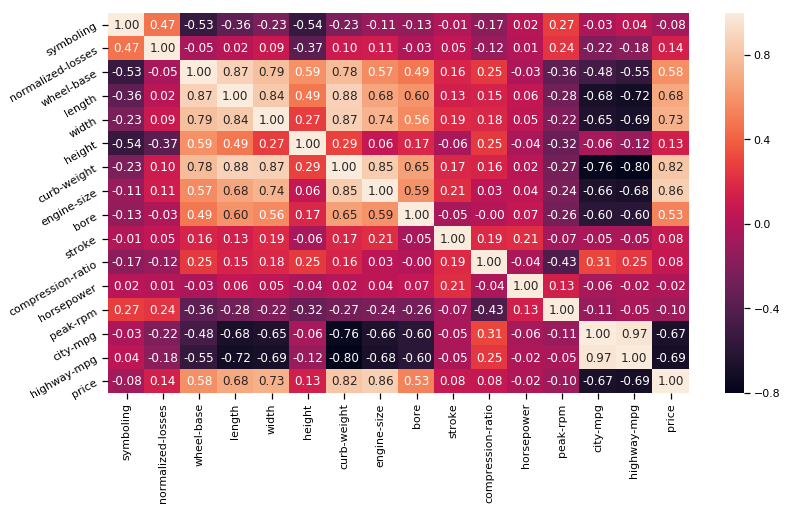

In [31]:
import seaborn as sns
corr = automobile.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

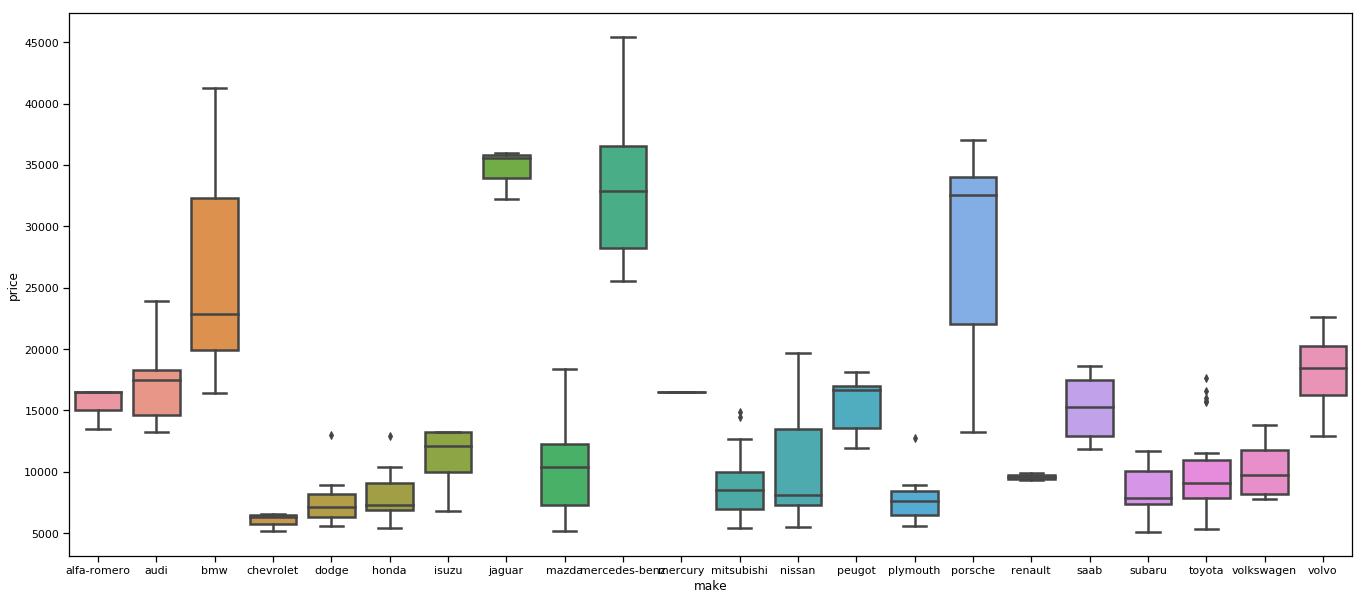

In [32]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=automobile)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


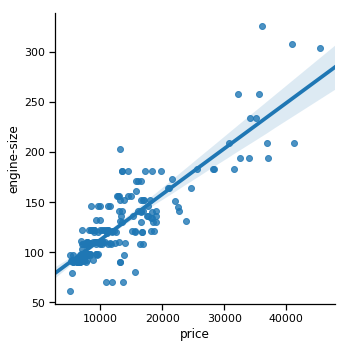

In [33]:
g = sns.lmplot('price',"engine-size", automobile);

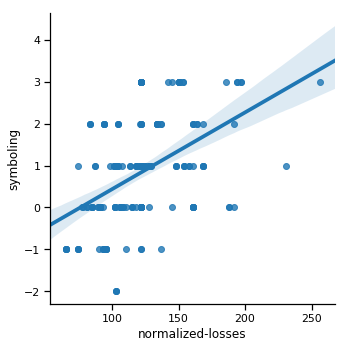

In [34]:
g = sns.lmplot('normalized-losses',"symboling", automobile);

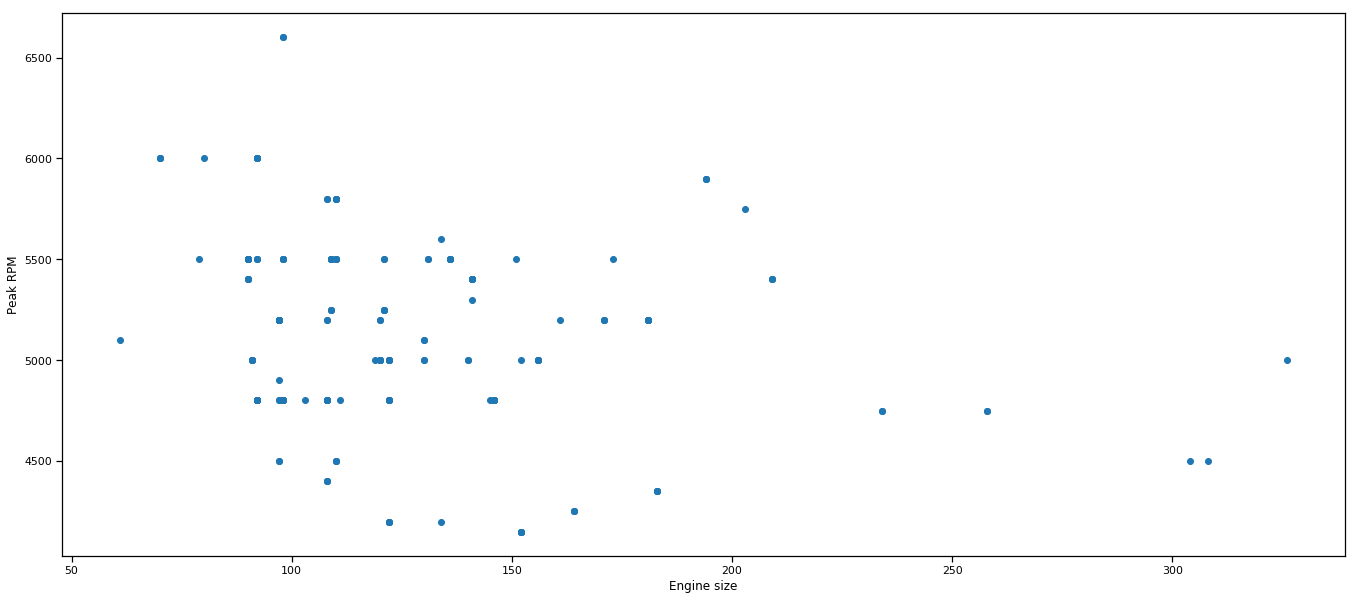

In [35]:
plt.scatter(automobile['engine-size'],automobile['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

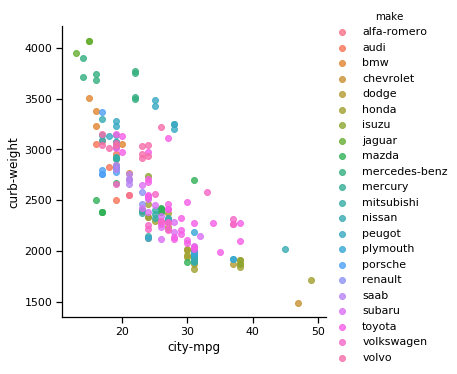

In [36]:
g = sns.lmplot('city-mpg',"curb-weight", automobile, hue="make", fit_reg=False);

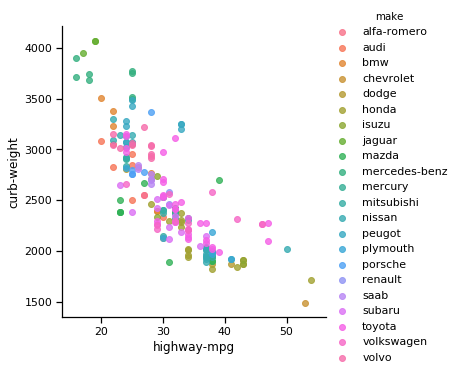

In [37]:
g = sns.lmplot('highway-mpg',"curb-weight", automobile, hue="make",fit_reg=False);

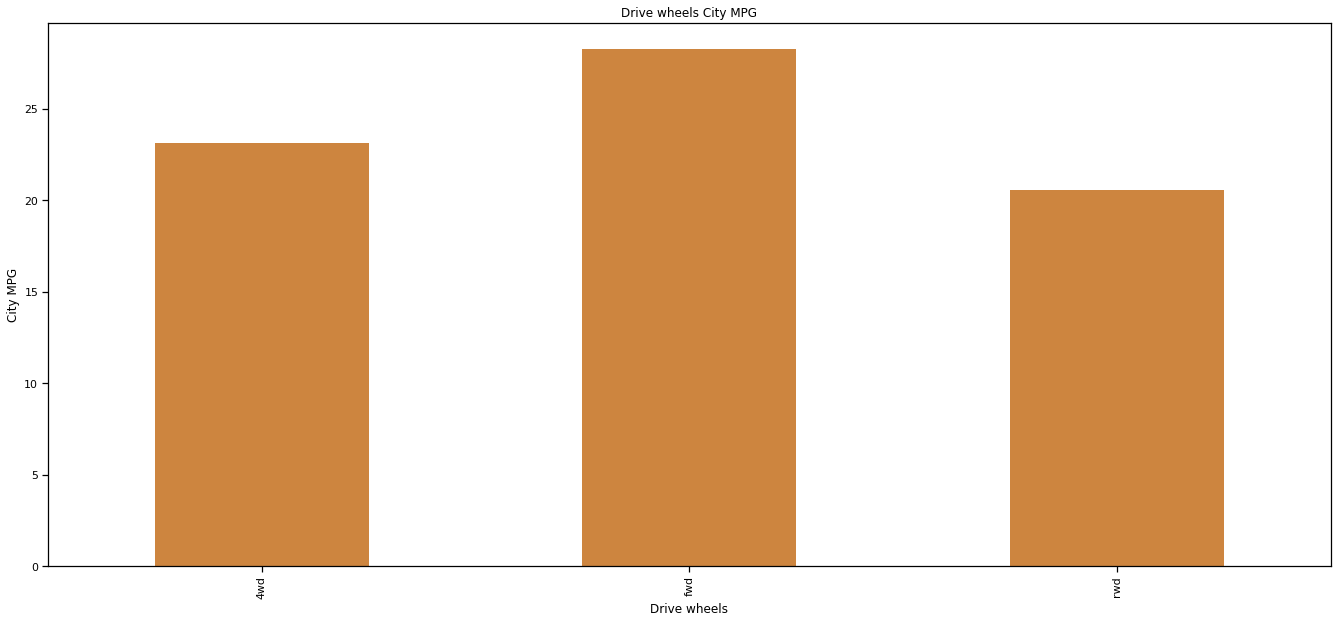

In [38]:
automobile.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

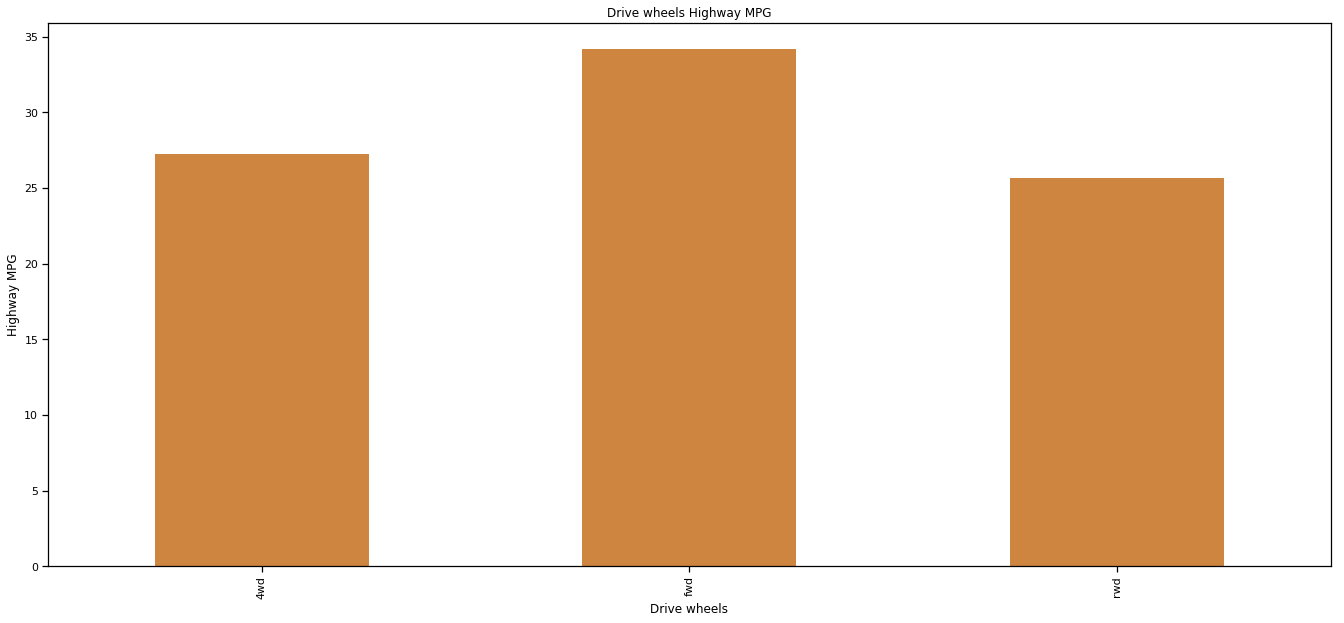

In [39]:
automobile.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels');

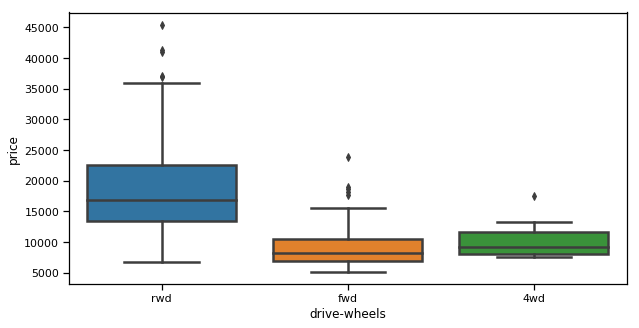

In [40]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=automobile)

In [ ]:
pd.pivot_table(automobile,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');